In [21]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
shape_data = "Resources/shape_data.csv"
state_abbrev = "Resources/state_abbrev.csv"


# Read School and Student Data File and store into Pandas DataFrames
shape_data_df = pd.read_csv(shape_data)
state_abbrev_df = pd.read_csv(state_abbrev)

#shape_data_df.head()
shape_data_df=shape_data_df[shape_data_df["country"]=="us"]
shape_data_df.head()

C:\Users\grety\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,datetime,city,state,country,shape_category,shape,shape_reported,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,oblong,cylinder,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,roundish,disk,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,light,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,roundish,sphere,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,roundish,disk,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [22]:
grouped_by_state = shape_data_df.groupby(["state", "shape_category"])
grouped_by_state.count()

datetime  city  country  shape  shape_reported  \
state shape_category                                                   
ak    changing               5     5        5      5               5   
      diamond                4     4        4      4               4   
      light                100   100      100    100             100   
      oblong                15    15       15     15              15   
      other                 43    43       43     43              43   
...                        ...   ...      ...    ...             ...   
wy    oblong                10    10       10     10              10   
      other                 30    30       30     30              30   
      oval                   8     8        8      8               8   
      roundish              51    51       51     51              51   
      triangulesque         14    14       14     14              14   

                      duration (seconds)  duration (hours/min)  comments  \
state shape_category                                                       
ak    changing                         5                     5         5   
      diamond                          4                     4         4   
      light                          100                   100       100   
      oblong                          15                    15        15   
      other                           43                    43        43   
...                                  ...                   ...       ...   
wy    oblong                          10                    10        10   
      other                           30                    30        30   
      oval                             8                     8         8   
      roundish                        51                    51        51   
      triangulesque                   14                    14        14   

                      date posted  latitude  longitude   
state shape_category                                     
ak    changing                  5         5           5  
      diamond                   4         4           4  
      light                   100       100         100  
      oblong                   15        15          15  
      other                    43        43          43  
...                           ...       ...         ...  
wy    oblong                   10        10          10  
      other                    30        30          30  
      oval                      8         8           8  
      roundish                 51        51          51  
      triangulesque            14        14          14  

[501 rows x 11 columns]

In [23]:
grouped_by_state1 = grouped_by_state[["datetime"]]
state_df = grouped_by_state1.count()

state_df.head()

datetime
state shape_category          
ak    changing               5
      diamond                4
      light                100
      oblong                15
      other                 43

In [24]:
grouped_state_df = state_df.rename(columns={"datetime":"sightings"})
grouped_state_df.head(20)

sightings
state shape_category           
ak    changing                5
      diamond                 4
      light                 100
      oblong                 15
      other                  43
      oval                   18
      roundish              100
      triangulesque          26
al    changing               12
      chevron                 9
      cross                   3
      diamond                15
      light                 143
      oblong                 52
      other                  93
      oval                   31
      roundish              192
      triangulesque          79
ar    changing               18
      chevron                10

In [25]:
grouped_state1_df=grouped_state_df.reset_index(drop=False)
grouped_state1_df.head()


,state,shape_category,sightings
0,ak,changing,5
1,ak,diamond,4
2,ak,light,100
3,ak,oblong,15
4,ak,other,43


In [41]:
y_axis = grouped_state1_df["sightings"].groupby(grouped_state1_df["state"]).sum()
y_axis


state
ak     311
al     629
ar     578
az    2362
ca    8684
co    1385
ct     866
dc       7
de     165
fl    3754
ga    1236
hi     257
ia     669
id     508
il    2447
in    1268
ks     599
ky     844
la     547
ma    1238
md     818
me     544
mi    1781
mn     996
mo    1431
ms     368
mt     460
nc    1722
nd     123
ne     374
nh     482
nj    1236
nm     693
nv     778
ny    2915
oh    2252
ok     714
or    1667
pa    2319
pr      24
ri     224
sc     986
sd     177
tn    1091
tx    3399
ut     611
va    1248
vt     254
wa    3708
wi    1205
wv     438
wy     169
Name: sightings, dtype: int64

In [59]:
x_axis_df = grouped_state1_df["state"].unique()
x_axis_df

array(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
       'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'pr', 'ri', 'sc', 'sd', 'tn',
       'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy'], dtype=object)

([<matplotlib.axis.XTick at 0x1d42c7458b0>,
 [Text(0, 0, 'ak'),
  Text(0, 0, 'al'),
  Text(0, 0, 'ar'),
  Text(0, 0, 'az'),
  Text(0, 0, 'ca'),
  Text(0, 0, 'co'),
  Text(0, 0, 'ct'),
  Text(0, 0, 'dc'),
  Text(0, 0, 'de'),
  Text(0, 0, 'fl'),
  Text(0, 0, 'ga'),
  Text(0, 0, 'hi'),
  Text(0, 0, 'ia'),
  Text(0, 0, 'id'),
  Text(0, 0, 'il'),
  Text(0, 0, 'in'),
  Text(0, 0, 'ks'),
  Text(0, 0, 'ky'),
  Text(0, 0, 'la'),
  Text(0, 0, 'ma'),
  Text(0, 0, 'md'),
  Text(0, 0, 'me'),
  Text(0, 0, 'mi'),
  Text(0, 0, 'mn'),
  Text(0, 0, 'mo'),
  Text(0, 0, 'ms'),
  Text(0, 0, 'mt'),
  Text(0, 0, 'nc'),
  Text(0, 0, 'nd'),
  Text(0, 0, 'ne'),
  Text(0, 0, 'nh'),
  Text(0, 0, 'nj'),
  Text(0, 0, 'nm'),
  Text(0, 0, 'nv'),
  Text(0, 0, 'ny'),
  Text(0, 0, 'oh'),
  Text(0, 0, 'ok'),
  Text(0, 0, 'or'),
  Text(0, 0, 'pa'),
  Text(0, 0, 'pr'),
  Text(0, 0, 'ri'),
  Text(0, 0, 'sc'),
  Text(0, 0, 'sd'),
  Text(0, 0, 'tn'),
  Text(0, 0, 'tx'),
  Text(0, 0, 'ut'),
  Text(0, 0, 'va'),
  Text(0, 0, 'vt

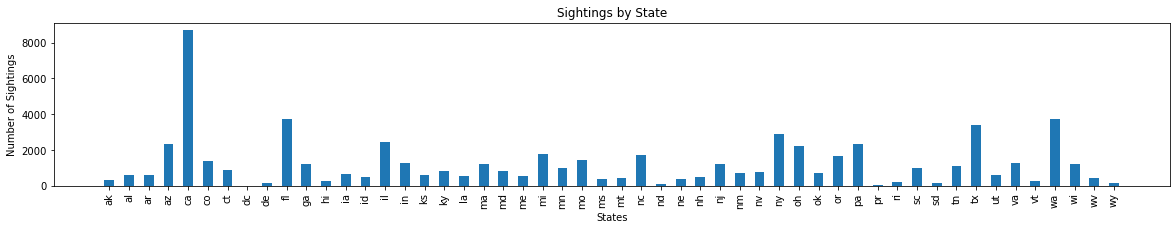

In [60]:
plt.figure(figsize=(20,3))
y_axis = grouped_state1_df["sightings"].groupby(grouped_state1_df["state"]).sum()
x_axis = np.arange(len(y_axis))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, width=0.5, alpha=1, align="center")
plt.title("Sightings by State")
plt.xlabel("States")
plt.ylabel("Number of Sightings")


plt.xticks(tick_locations, x_axis_df, rotation="vertical")

In [26]:
dc = grouped_state1_df.loc[grouped_state1_df["state"] == "dc", :]
print(dc)


   state shape_category  sightings
68    dc       changing          1
69    dc          light          1
70    dc         oblong          1
71    dc          other          1
72    dc       roundish          3


In [27]:
oh = grouped_state1_df.loc[grouped_state1_df["state"] == "oh", :]
print(oh)

    state shape_category  sightings
336    oh       changing         52
337    oh        chevron         17
338    oh          cross          9
339    oh        diamond         36
340    oh          light        466
341    oh         oblong        172
342    oh          other        357
343    oh           oval        106
344    oh       roundish        772
345    oh  triangulesque        265


([<matplotlib.axis.XTick at 0x1d429ea5100>,
 [Text(-2.0, 0, 'changing'),
  Text(0.0, 0, 'chevron'),
  Text(2.0, 0, 'cross'),
  Text(4.0, 0, 'diamond'),
  Text(6.0, 0, 'light'),
  Text(8.0, 0, 'oblong'),
  Text(10.0, 0, 'other'),
  Text(0, 0, 'oval'),
  Text(0, 0, 'roundish'),
  Text(0, 0, 'triangulesque')])

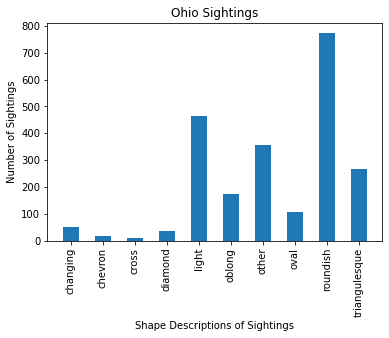

In [38]:
y_axis = oh["sightings"]
x_axis = np.arange(len(oh.shape_category))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, width=0.5, alpha=1, align="center")
plt.title("Ohio Sightings")
plt.xlabel("Shape Descriptions of Sightings")
plt.ylabel("Number of Sightings")


plt.xticks(tick_locations, oh.shape_category, rotation="vertical")

([<matplotlib.axis.XTick at 0x1d42a15b730>,
 [Text(0, 0, 'changing'),
  Text(0, 0, 'light'),
  Text(0, 0, 'oblong'),
  Text(0, 0, 'other'),
  Text(0, 0, 'roundish')])

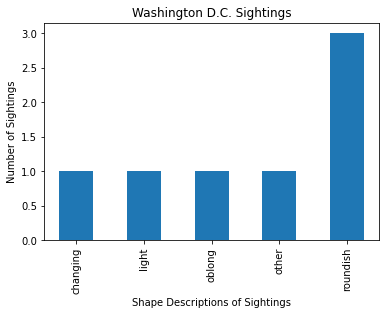

In [39]:
y_axis = dc["sightings"]
x_axis = np.arange(len(dc.shape_category))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, width=0.5, alpha=1, align="center")
plt.title("Washington D.C. Sightings")
plt.xlabel("Shape Descriptions of Sightings")
plt.ylabel("Number of Sightings")

plt.xticks(tick_locations, dc.shape_category, rotation="vertical")